In [2]:
import numpy as np
import time
from glob import glob
import matplotlib.pyplot as plt

## Redefine some basic quantities

In [3]:
# Define the wavenumber and angular frequency axis 
k0=0.02; kxmin=0.001; kxmax=0.05; Nkx=150
kx=np.linspace(kxmin,kxmax,Nkx)
g=9.81
omega=np.sqrt(g*kx)

# Calculate the wavenumber increment
dkx=np.zeros(Nkx,float)
for n in range(Nkx-1):
    dkx[n]=kx[n+1]-kx[n]
dkx[Nkx-1]=dkx[Nkx-2]

# Define the group size at focus
L=(2.36)*(k0)**-1

# Calculate the group spectrum and associated amplitudes
G=L*((2*np.pi)**-0.5)*np.exp(-(L**2)*0.5*(kx-k0)**2)
A0=5
a=A0*G*dkx/np.sum(G*dkx)

# Uniform phase
#phi0=DANSLENOMDUFICHIER
#phi=phi0*np.ones(Nkx)

# Derive some quantities related to derivatives of omega at k0
cg0=(np.sqrt(g/k0))*(0.5)
par2om=(np.sqrt(g*k0)/(k0**2))*(-0.25)
tau=L**2/par2om

# Define the temporal and spatial axis
dt=0.13*2*np.pi/np.max(omega)
Nt=4*int(np.abs(tau)/dt)
t=np.linspace(-dt*Nt,0,Nt)

Lx=4*(2*np.pi/k0)
dx=0.000025*2*np.pi/kxmax
Nx=int(Lx/dx+2)
x=np.linspace(-Lx/2,Lx/2,Nx)

#---------------------------------------------------#

Spread_x=np.sqrt(L**2+(L**(-2))*(par2om*t)**2)
c0=(np.sqrt(g/k0))
ccr_1ord=cg0+0.5*k0*par2om-c0
ccr_grad_1ord=(-c0+cg0)*k0*t/tau
ccr_2ord=c0-cg0-0.5*k0*par2om
ccr_grad_2ord=k0*(1.5*par2om*k0+4*c0-4*cg0)*t/tau
ccr_lapl_2ord=2*((c0-cg0+0.5*k0*par2om)*(t/tau)**2-0.5*k0*par2om)*(k0)**2
c_grad_expect=ccr_grad_1ord[:-2]/((k0*Spread_x[:-2])**2)+0.5*ccr_grad_2ord[:-2]/((k0*Spread_x[:-2])**4)

#---------------#

nstart1=0
nstart2=85
nstart3=85+42
nend=Nt-3

In [7]:
dx,dt,4*tau*c0*k0/(2*np.pi),(2*np.pi)/(c0*k0)

(0.003141592653589793,
 1.166282381021257,
 -14.182869936713926,
 14.185033534428872)

## Load the data

In [4]:
# Call all the files
fnames = glob('GWP_2D_Lk02_phi*.npz')
fnames.sort()
Nfi=len(fnames)

In [5]:
Nfi

999

In [6]:
fnames[-1],fnames[0]

('GWP_2D_Lk02_phi3.13908.npz', 'GWP_2D_Lk02_phi-0.00736.npz')

In [7]:
# Read one file
data=np.load(fnames[-1])

In [8]:
data['tfoc1'][0:50]

array([  0.        ,   0.        ,   0.        ,   9.01896561,
         9.01142558, -13.729254  , -32.95545565, -44.29646896,
       -50.23687148, -49.06545331, -43.25305476, -35.03862342,
       -26.32013139, -17.67908431, -12.00504457, -10.07327714,
       -11.28635641, -13.1620645 , -16.01679132, -17.36400575,
       -17.6914528 , -16.15144412, -13.57101749, -11.2421568 ,
        -9.69897152,  -9.05902352,  -9.13256762, -10.22722012,
       -11.26797907, -12.12035939, -11.95117623, -11.17148711,
       -10.18608746,  -9.2563452 ,  -8.38055123,  -8.03982743,
        -8.20585181,  -8.92604961,  -9.76646507, -10.6837664 ,
       -11.08733147, -11.19907279, -10.5250395 ,  -9.69634295,
        -8.93598484,  -8.68503752,  -8.71232815,  -9.18795182,
        -9.84774938, -10.52598545])

In [9]:
len(data['tfoc1']),len(data['tau_abs1']),len(data['A_ratio1']),len(data['L1'])

(169, 169, 169, 169)

In [10]:
# Concatenate  output results

# Initialize
TFOC1=np.zeros((Nfi,Nt-3))
TAUABS1=np.zeros((Nfi,Nt-3))
ARATIO1=np.zeros((Nfi,Nt-3))
LL1=np.zeros((Nfi,Nt-3))
TFOC2=np.zeros((Nfi,Nt-3))
TAUABS2=np.zeros((Nfi,Nt-3))
ARATIO2=np.zeros((Nfi,Nt-3))
LL2=np.zeros((Nfi,Nt-3))
TFOC3=np.zeros((Nfi,Nt-3))
TAUABS3=np.zeros((Nfi,Nt-3))
ARATIO3=np.zeros((Nfi,Nt-3))
LL3=np.zeros((Nfi,Nt-3))

# Read
for n in range(Nfi):
    data=np.load(fnames[n])
    TFOC1[n,:]=data['tfoc1']
    TAUABS1[n,:]=data['tau_abs1']
    ARATIO1[n,:]=data['A_ratio1']
    LL1[n,:]=data['L1']
    TFOC2[n,:]=data['tfoc2']
    TAUABS2[n,:]=data['tau_abs2']
    ARATIO2[n,:]=data['A_ratio2']
    LL2[n,:]=data['L2']
    TFOC3[n,:]=data['tfoc3']
    TAUABS3[n,:]=data['tau_abs3']
    ARATIO3[n,:]=data['A_ratio3']
    LL3[n,:]=data['L3']

## Plot

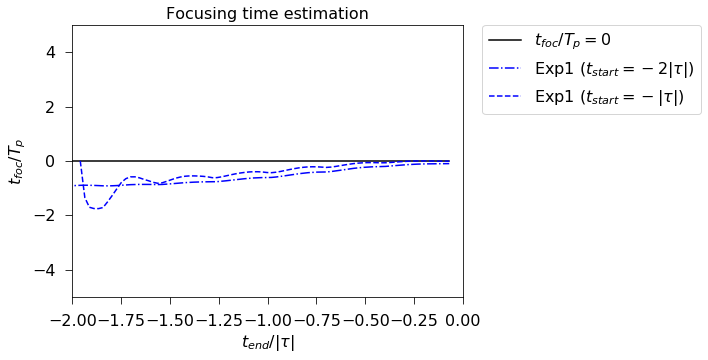

In [11]:
# Avec un seul fichier
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)
ax.plot(t[nstart1:nend]/np.abs(tau),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{foc}/T_p=0$')
ax.plot(t[nstart1+2:nend]/np.abs(tau),data['tfoc1'][nstart1+2:nend]*c0*k0/(2*np.pi),'-.b',
        label=r'Exp1 ($t_{start}=-2|\tau|$)')
ax.plot(t[nstart2+2:nend]/np.abs(tau),data['tfoc2'][nstart2+2:nend]*c0*k0/(2*np.pi),'--b',
        label=r'Exp1 ($t_{start}=-|\tau|$)')
ax.set_title('Focusing time estimation',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel('$t_{foc}/T_p$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
ax.set_ylim([-5,5])
ax.set_xlim([-2,0])
fig.set_size_inches([7,5])
plt.show()

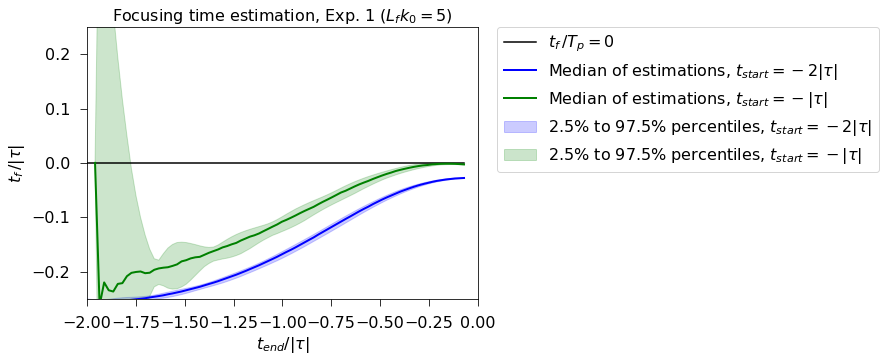

In [12]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]/np.abs(tau),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{f}\, /T_p=0$')

# valeur médiane
ax.plot(t[nstart1+2:nend]/np.abs(tau), np.median(TFOC1,axis=0)[nstart1+2:nend]/np.abs(tau), '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]/np.abs(tau), np.median(TFOC2,axis=0)[nstart2+2:nend]/np.abs(tau), '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# quantiles à 2.5% et 97.5%
ax.fill_between(t[nstart1+2:nend]/np.abs(tau), np.percentile(TFOC1,axis=0,q=2.5)[nstart1+2:nend]/np.abs(tau),
                np.percentile(TFOC1,axis=0,q=97.5)[nstart1+2:nend]/np.abs(tau),
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')

ax.fill_between(t[nstart2+2:nend]/np.abs(tau), np.percentile(TFOC2,axis=0,q=2.5)[nstart2+2:nend]/np.abs(tau),
                np.percentile(TFOC2,axis=0,q=97.5)[nstart2+2:nend]/np.abs(tau),
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ax.set_title(r'Focusing time estimation, Exp. 1 ($L_f k_0=5$)',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel(r'$t_{f}\, /|\tau|$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
ax.set_ylim([-0.25,0.25])
ax.set_xlim([-2,0])
fig.set_size_inches([7,5])
plt.show()

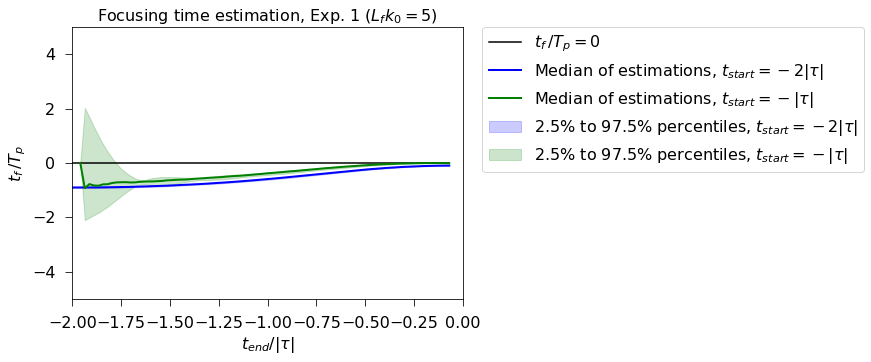

In [13]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]/np.abs(tau),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{f}\, /T_p=0$')

# valeur médiane
ax.plot(t[nstart1+2:nend]/np.abs(tau), np.median(TFOC1,axis=0)[nstart1+2:nend]*c0*k0/(2*np.pi), '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]/np.abs(tau), np.median(TFOC2,axis=0)[nstart2+2:nend]*c0*k0/(2*np.pi), '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# quantiles à 2.5% et 97.5%
ax.fill_between(t[nstart1+2:nend]/np.abs(tau), np.percentile(TFOC1,axis=0,q=2.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC1,axis=0,q=97.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')

ax.fill_between(t[nstart2+2:nend]/np.abs(tau), np.percentile(TFOC2,axis=0,q=2.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC2,axis=0,q=97.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ax.set_title(r'Focusing time estimation, Exp. 1 ($L_f k_0=5$)',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel('$t_{f}\, /T_p$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
ax.set_ylim([-5,5])
ax.set_xlim([-2,0])
fig.set_size_inches([7,5])
plt.show()

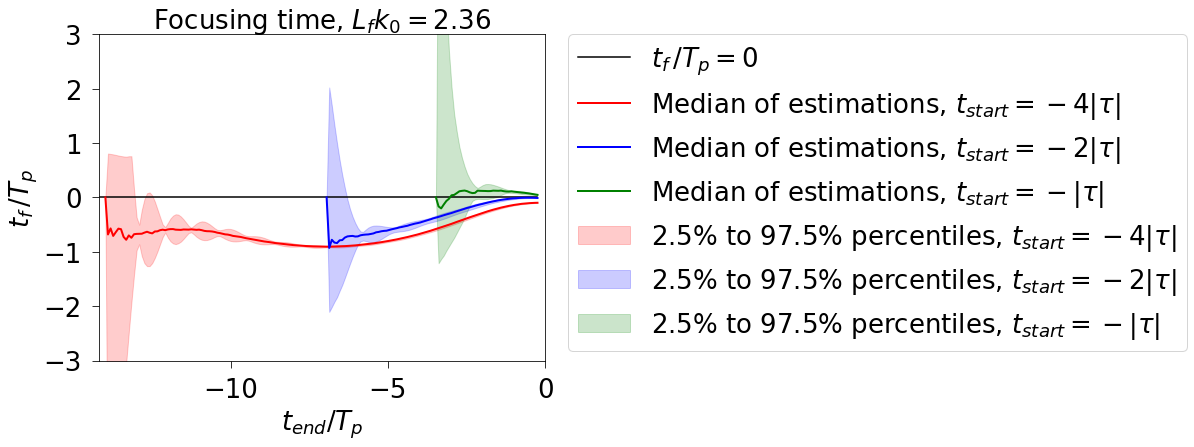

In [22]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]*c0*k0/(2*np.pi),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{f}\, /T_p=0$')


# médiane
ax.plot(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.median(TFOC1,axis=0)[nstart1+2:nend]*c0*k0/(2*np.pi), '-r',
        linewidth=2,label=r'Median of estimations, $t_{start}=-4|\tau|$')
ax.plot(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.median(TFOC2,axis=0)[nstart2+2:nend]*c0*k0/(2*np.pi), '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart3+2:nend]*c0*k0/(2*np.pi), np.median(TFOC3,axis=0)[nstart3+2:nend]*c0*k0/(2*np.pi), '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# intervalle de confiance à 95% (dans to cas entre le quantile 2.5% et 97.5%)
ax.fill_between(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.percentile(TFOC1,axis=0,q=2.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC1,axis=0,q=97.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                color='r', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-4|\tau|$')
ax.fill_between(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.percentile(TFOC2,axis=0,q=2.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC2,axis=0,q=97.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')
ax.fill_between(t[nstart3+2:nend]*c0*k0/(2*np.pi), np.percentile(TFOC3,axis=0,q=2.5)[nstart3+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC3,axis=0,q=97.5)[nstart3+2:nend]*c0*k0/(2*np.pi),
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ftsz=26

ax.set_title(r'Focusing time, $L_f k_0=2.36$',fontsize=ftsz)
ax.set_xlabel(r'$t_{end}/T_p$',fontsize=ftsz)
ax.set_ylabel('$t_{f}\, /T_p$',fontsize=ftsz)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=ftsz)
ax.tick_params(length=7,labelsize=ftsz,direction='out',pad=10)
ax.set_ylim([-3,3])
ax.set_xlim([-4*np.abs(tau)*c0*k0/(2*np.pi),0])
fig.set_size_inches([8,6])
plt.show()

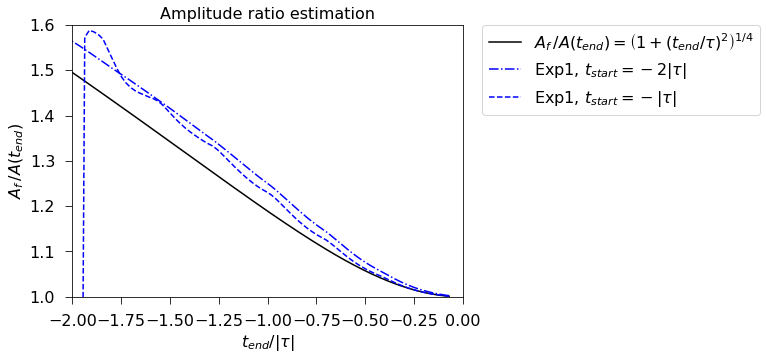

In [15]:
# Avec un seul fichier
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)
ax.plot(t[nstart1:nend]/np.abs(tau),(1+(t[nstart1:nend]/tau)**2)**0.25,'k',
        label=r'$A_{f}\, /A(t_{end})=\left(1+\left(t_{end}/\tau\right)^2\right)^{1/4}$')
ax.plot(t[nstart1+2:nend]/np.abs(tau),data['A_ratio1'][nstart1+2:nend],'-.b',label=r'Exp1, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]/np.abs(tau),data['A_ratio2'][nstart2+2:nend],'--b',label=r'Exp1, $t_{start}=-|\tau|$')
ax.set_ylim([1,1.6])
ax.set_xlim([-2,0])
ax.set_title('Amplitude ratio estimation',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel(r'$A_{f}\, /A(t_{end})$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
fig.set_size_inches([7,5])
plt.show()

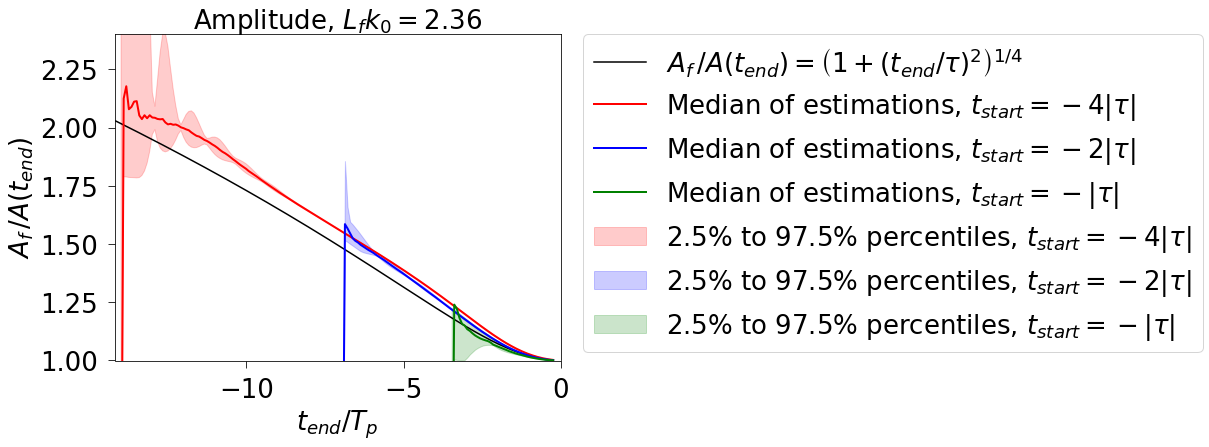

In [21]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]*c0*k0/(2*np.pi),(1+(t[nstart1:nend]/tau)**2)**0.25,'k',
        label=r'$A_{f}\, /A(t_{end})=\left(1+\left(t_{end}/\tau\right)^2\right)^{1/4}$')

# valeur moyenne
ax.plot(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.median(ARATIO1,axis=0)[nstart1+2:nend], '-r',
        linewidth=2,label=r'Median of estimations, $t_{start}=-4|\tau|$')
ax.plot(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.median(ARATIO2,axis=0)[nstart2+2:nend], '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart3+2:nend]*c0*k0/(2*np.pi), np.median(ARATIO3,axis=0)[nstart3+2:nend], '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# intervalle de confiance à 95% (dans to cas entre le quantile 2.5% et 97.5%)
ax.fill_between(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.percentile(ARATIO1,axis=0,q=2.5)[nstart1+2:nend],
                np.percentile(ARATIO1,axis=0,q=97.5)[nstart1+2:nend],
                color='r', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-4|\tau|$')
ax.fill_between(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.percentile(ARATIO2,axis=0,q=2.5)[nstart2+2:nend],
                np.percentile(ARATIO2,axis=0,q=97.5)[nstart2+2:nend],
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')
ax.fill_between(t[nstart3+2:nend]*c0*k0/(2*np.pi), np.percentile(ARATIO3,axis=0,q=2.5)[nstart3+2:nend],
                np.percentile(ARATIO2,axis=0,q=97.5)[nstart3+2:nend],
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ftsz=26

ax.set_title(r'Amplitude, $L_f k_0=2.36$',fontsize=ftsz)
ax.set_xlabel(r'$t_{end}/T_p$',fontsize=ftsz)
ax.set_ylabel(r'$A_{f}\, /A(t_{end})$',fontsize=ftsz)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=ftsz)
ax.tick_params(length=7,labelsize=ftsz,direction='out',pad=10)
ax.set_ylim([1,2.4])
ax.set_xlim([-4*np.abs(tau)*c0*k0/(2*np.pi),0])
fig.set_size_inches([8,6])
plt.show()

In [20]:
L*k0

2.36

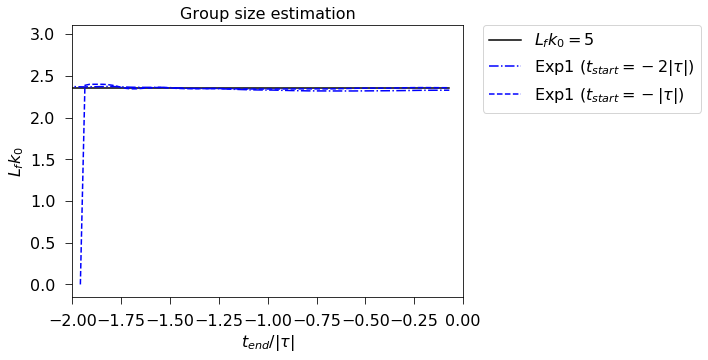

In [17]:
# Avec un seul fichier
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)
ax.plot(t[nstart1:nend]/np.abs(tau),k0*L*np.ones(len(t[nstart1:nend])),'k',label=r'$L_{f}k_0=5$')
ax.plot(t[nstart1+2:nend]/np.abs(tau),k0*data['L1'][nstart1+2:nend],'-.b',label=r'Exp1 ($t_{start}=-2|\tau|$)')
ax.plot(t[nstart2+2:nend]/np.abs(tau),k0*data['L2'][nstart2+2:nend],'--b',label=r'Exp1 ($t_{start}=-|\tau|$)')
#ax.set_ylim([4,6])
ax.set_xlim([-2,0])
ax.set_title('Group size estimation',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel(r'$L_{f}k_0 $',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
fig.set_size_inches([7,5])
plt.show()

In [18]:
eps=0.2*2.36/5
2.36*(1-eps),2.36*(1+eps)

(2.137216, 2.5827839999999997)

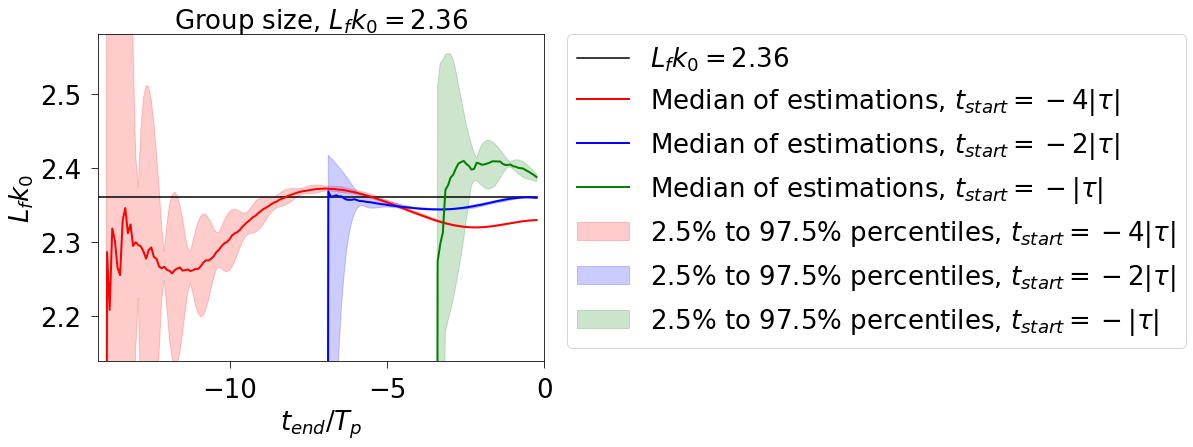

In [23]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]*c0*k0/(2*np.pi),k0*L*np.ones(len(t[nstart1:nend])),'k',label=r'$L_{f}k_0=2.36$')

# valeur moyenne
ax.plot(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.median(LL1,axis=0)[nstart1+2:nend]*k0, '-r',
        linewidth=2,label=r'Median of estimations, $t_{start}=-4|\tau|$')
ax.plot(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.median(LL2,axis=0)[nstart2+2:nend]*k0, '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart3+2:nend]*c0*k0/(2*np.pi), np.median(LL3,axis=0)[nstart3+2:nend]*k0, '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# intervalle de confiance à 95% (dans to cas entre le quantile 2.5% et 97.5%)
ax.fill_between(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.percentile(LL1,axis=0,q=2.5)[nstart1+2:nend]*k0,
                np.percentile(LL1,axis=0,q=97.5)[nstart1+2:nend]*k0,
                color='r', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-4|\tau|$')
ax.fill_between(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.percentile(LL2,axis=0,q=2.5)[nstart2+2:nend]*k0,
                np.percentile(LL2,axis=0,q=97.5)[nstart2+2:nend]*k0,
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')
ax.fill_between(t[nstart3+2:nend]*c0*k0/(2*np.pi), np.percentile(LL3,axis=0,q=2.5)[nstart3+2:nend]*k0,
                np.percentile(LL3,axis=0,q=97.5)[nstart3+2:nend]*k0,
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ftsz=26

ax.set_ylim([2.14,2.58])
ax.set_xlim([-4*np.abs(tau)*c0*k0/(2*np.pi),0])
ax.set_title(r'Group size, $L_f k_0=2.36 $',fontsize=ftsz)
ax.set_xlabel(r'$t_{end}/T_p$',fontsize=ftsz)
ax.set_ylabel(r'$L_{f}k_0 $',fontsize=ftsz)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=ftsz)
ax.tick_params(length=7,labelsize=ftsz,direction='out',pad=10)
fig.set_size_inches([8,6])
plt.show()